In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


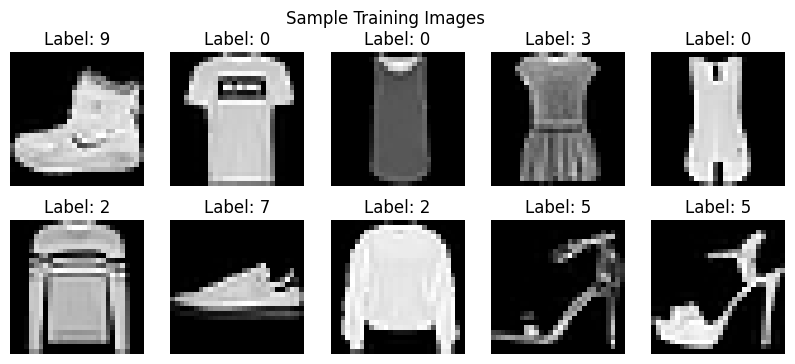

In [ ]:
# Show some training samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

In [ ]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for dense layers (flatten images)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

print("Flattened training data shape:", X_train_flat.shape)

Flattened training data shape: (60000, 784)


In [ ]:
# Basic Sequential model
model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile with SGD optimizer
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model and save history
history = model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6533 - loss: 1.0779 - val_accuracy: 0.8015 - val_loss: 0.5812
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8151 - loss: 0.5521 - val_accuracy: 0.8248 - val_loss: 0.5062
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8325 - loss: 0.4950 - val_accuracy: 0.8374 - val_loss: 0.4678
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8431 - loss: 0.4598 - val_accuracy: 0.8363 - val_loss: 0.4702
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8468 - loss: 0.4425 - val_accuracy: 0.8468 - val_loss: 0.4470
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8548 - loss: 0.4188 - val_accuracy: 0.8479 - val_loss: 0.4270
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.4053 - val_accuracy: 0.8534 - val_loss: 0.4222
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8610 - loss: 

Somehow running the cell three times meant it continued with the same accuracy & loss from the last epoch of the last iteration

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8823 - loss: 0.3492
Test accuracy: 0.8823
Test loss: 0.3492


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.84      0.91      0.87      1000
           4       0.77      0.85      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.78      0.64      0.70      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



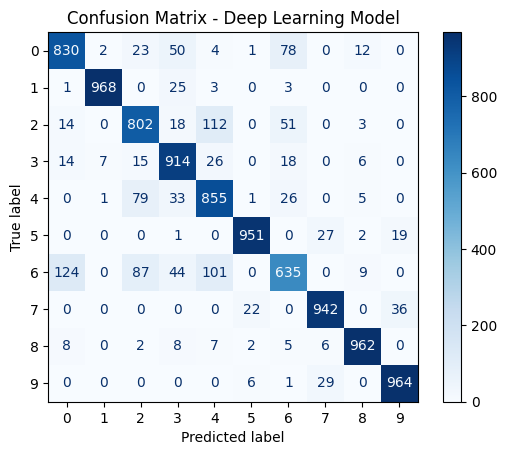

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

In [ ]:
# Deeper network with more neurons
deep_model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

deep_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# # Compile with SGD optimizer
# deep_model.compile(optimizer='sgd',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Compile with Adam optimizer
deep_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



In [ ]:
# Train the model and save history
history = deep_model.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
 314/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9808 - loss: 0.0578

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hidden_layers, input_shape=(28*28,), num_classes=10,
                activation='relu', output_activation='softmax'):
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Add hidden layers
    for units in hidden_layers:
        model.add(layers.Dense(units, activation=activation))

    # Output layer
    model.add(layers.Dense(num_classes, activation=output_activation))
    return model


model1 = build_model([256, 128, 64, 32])    # 3 hidden layers
model2 = build_model([500, 250, 125, 62, 31])             # 1 hidden layer with 500 neurons
model3 = build_model([128, 256, 512, 1124])        # 2 hidden layers increasing
model4 = build_model([])                # No hidden layers, just direct output


In [ ]:
# Compile with adam optimizer
model1.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model2.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model3.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
model4.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Train the model and save history
history = model1.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model2.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model3.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)
# Train the model and save history
history = model4.fit(
    X_train_flat, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7609 - loss: 0.6787 - val_accuracy: 0.8325 - val_loss: 0.4515
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8558 - loss: 0.3959 - val_accuracy: 0.8699 - val_loss: 0.3631
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8732 - loss: 0.3455 - val_accuracy: 0.8751 - val_loss: 0.3408
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8833 - loss: 0.3146 - val_accuracy: 0.8812 - val_loss: 0.3354
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8872 - loss: 0.2988 - val_accuracy: 0.8773 - val_loss: 0.3565
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8975 - loss: 0.2797 - val_accuracy: 0.8839 - val_loss: 0.3286
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8984 - loss: 0.2699 - val_accuracy: 0.8822 - val_loss: 0.3323
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9021 - loss: 0.258

I had already done SGD & Adam, so I will do the others

In [29]:
deep_model2 = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
# Compile with RMSprop optimizer
deep_model.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [36]:
history = model2.fit(
    X_train_flat, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9683 - loss: 0.0849 - val_accuracy: 0.8950 - val_loss: 0.6237
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9678 - loss: 0.0835 - val_accuracy: 0.8971 - val_loss: 0.5686
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9693 - loss: 0.0830 - val_accuracy: 0.8937 - val_loss: 0.6105
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9646 - loss: 0.0942 - val_accuracy: 0.8950 - val_loss: 0.5958
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9714 - loss: 0.0758 - val_accuracy: 0.8957 - val_loss: 0.5887
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9686 - loss: 0.0819 - val_accuracy: 0.8916 - val_loss: 0.5791
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9691 - loss: 0.0814 - val_accuracy: 0.8941 - val_loss: 0.6254
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9737 -

In [37]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.8644 - loss: 0.3863
Test accuracy: 0.8644
Test loss: 0.3863


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.80      0.76      1000
           3       0.86      0.91      0.88      1000
           4       0.87      0.64      0.74      1000
           5       0.97      0.97      0.97      1000
           6       0.61      0.79      0.69      1000
           7       0.97      0.89      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.88      0.86      0.87     10000



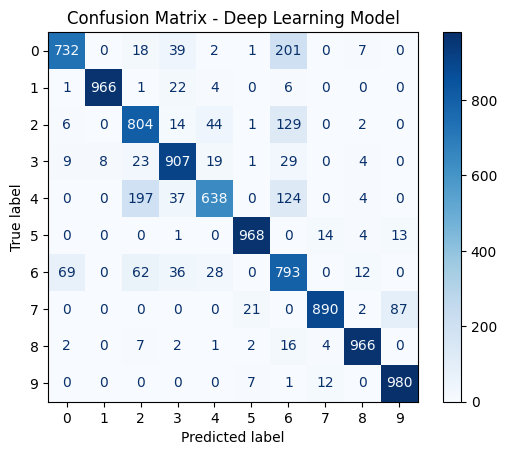

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

In [40]:
from tensorflow.keras import optimizers
# Compile with Momentum SGD Optimizer
optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)


In [41]:

# Compile with Nesterov Accelerated Gradient Optimizer
# optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile
deep_model2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
deep_model2.fit(X_train_flat, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7345 - loss: 0.7757
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8509 - loss: 0.4068
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8683 - loss: 0.3564
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8773 - loss: 0.3283
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8852 - loss: 0.3084


In [42]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.8644 - loss: 0.3863
Test accuracy: 0.8644
Test loss: 0.3863


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.80      0.76      1000
           3       0.86      0.91      0.88      1000
           4       0.87      0.64      0.74      1000
           5       0.97      0.97      0.97      1000
           6       0.61      0.79      0.69      1000
           7       0.97      0.89      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.88      0.86      0.87     10000



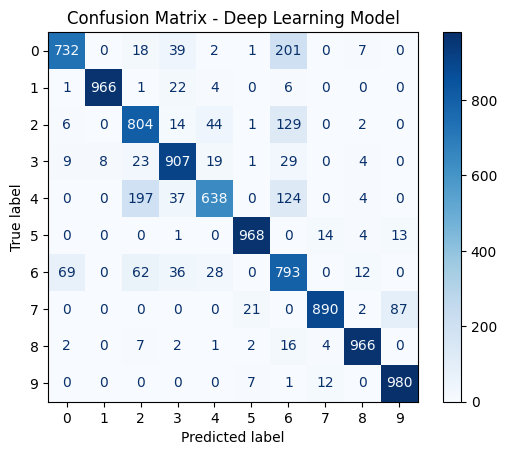

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Predict labels for the test set using the deep model
y_pred_deep = np.argmax(model.predict(X_test_flat), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)
print("Classification",classification_report(y_test, y_pred_deep))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()